<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Information" data-toc-modified-id="Project-Information-1">Project Information</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1">Import Libraries</a></span></li><li><span><a href="#Import-and-Examine-Data-&amp;-Format" data-toc-modified-id="Import-and-Examine-Data-&amp;-Format-1.2">Import and Examine Data &amp; Format</a></span><ul class="toc-item"><li><span><a href="#Deal-with-Colomns-w/-Strings" data-toc-modified-id="Deal-with-Colomns-w/-Strings-1.2.1">Deal with Colomns w/ Strings</a></span></li><li><span><a href="#Re-examine-Data-now-that-Everything-is-Numeric-or-Boolean" data-toc-modified-id="Re-examine-Data-now-that-Everything-is-Numeric-or-Boolean-1.2.2">Re-examine Data now that Everything is Numeric or Boolean</a></span></li></ul></li></ul></li></ul></div>

# Project Information

---

**_Dataset Information_**

- The dataset contains information about two sets of hospitals, one that participated in a policy intervention designed to improve patient safety `(Treatment = TRUE)`, and one that did not, `(Treatment = FALSE)`.
- The goal was to reduce central-line associated blood stream infections (CLABSIs), with lower rates being more desirable. The policy was implemented at the beginning of 2016. 
- The pre-intervention results are in the `SIR15` column, and the post-intervention results are in the `SIR16` column. 
- One tab in the Excel file has the data `(HOSPITAL_SAFETY)`, and the other has information on the data `(Data dictionary)`.

---

**_Tasks_**

**We would like you to complete the following tasks:**

* Complete an initial analysis of the data to estimate the effect of the intervention on CLABSI rates. (This could include EDA and modeling.)
* Communicate your findings to your larger MPR team via a high-level, not-highly-technical email to your colleagues informing them of the results.
* Include the code you used to run your analysis.

---

**_Guidelines_**

* Assume your team can use the following types of files: R, R markdown, Python, Jupyter notebook, Microsoft Office Suite, PDF.
* You may use any libraries available for R or Python to complete your analysis.
* **Prioritize including one or two visualizations or tables that help drive home your findings over lots of prose.**
* You may include a list of analytic next steps as part of the email to your team.

## Import Libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#!pip install jupyternotify
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
## Run %%notify to create notification for completed cell

<IPython.core.display.Javascript object>

## Import and Examine Data & Format

In [157]:
df = pd.read_excel('HOSPITAL_SAFETY.xlsx', sheet_name=0)
column_info = pd.read_excel('HOSPITAL_SAFETY.xlsx', sheet_name=1, header=None)

In [158]:
low_cols = []
for col in df.columns:
    low_cols.append(col.lower())
low_cols[0] = 'hosp_id'
df.columns = low_cols

In [159]:
for i in range(len(column_info)):
    print(column_info.at[i,0].title())
    print(column_info.at[i,1])
    print()

Hosp.Id
Hospital Identifier

Name
Hospital name

County
Hospital geographic county

Region
US Census Division

Urban_Rural
Defines whether hospital is in an urban or rural location

Wage_Index
Measures cost of labor in a geographic area, where higher values translates to more expensive staff/higher salaries

Resident_To_Beds
Number of medical students per hospital beds

Beds
Number of beds available for patients at the hospital

Dshpct
Measures the proportion of poor, elderly, frail, or disables patients at a hospital, where higher values indicate greater proportions

Cost_To_Charge
A measure of profit, where higher values equal greater profit margins

Annual_Volume
Number of patients seen at the hospital in a given year

Casemix
Measures patient sickness, where higher levels correspond to sicker or more complex patients

Type
Hospital type

Ownership
Hospital ownership

Emergency_Services
Emergency services available at this hospital

Uses_Ehrs
Uses approved electronic health records


### Deal with Colomns w/ Strings

In [160]:
for col in df.columns:
    if df[col].dtype == 'O':
        print(col)

name
urban_rural
type
ownership


In [161]:
df.name.nunique() # Too many different values, likely unimportant for analysis and can be DROPPED

3148

In [162]:
df.urban_rural.value_counts() # Column can be DUMMIFIED since it is categorical

LURBAN    1364
OURBAN    1109
RURAL      790
Name: urban_rural, dtype: int64

In [163]:
df.type.nunique() # Column can be DROPPED since there is only one value in this column

1

In [164]:
df.ownership.value_counts() # Column can likely be DUMMIFIED since there are 10 different unique values

Voluntary non-profit - Private                 1374
Proprietary                                     681
Voluntary non-profit - Other                    355
Voluntary non-profit - Church                   269
Government - Hospital District or Authority     268
Government - Local                              169
Physician                                        60
Government - State                               47
Government - Federal                             35
Tribal                                            5
Name: ownership, dtype: int64

In [165]:
drops = ['name', 'type']
df = df.drop(columns=drops)

In [166]:
df.urban_rural = pd.get_dummies(df.urban_rural)
df.ownership = pd.get_dummies(df.ownership)

### Re-examine Data now that Everything is Numeric or Boolean

In [167]:
df.head()

,hosp_id,county,region,urban_rural,wage_index,resident_to_beds,beds,dshpct,cost_to_charge,annual_volume,casemix,ownership,emergency_services,uses_ehrs,denom16,sir16,denom15,sir15,treatment
0,10001,1340,5,0,0.7704,0.0,408,0.29862,0.197,7939,1.750650,0,True,1.0,7264.0,0.688,7117.0,2.816,1.0
1,10005,1470,5,0,0.8212,0.0,204,0.27654,0.303,4036,1.343089,0,True,1.0,2464.0,0.000,2786.0,2.114,0.0
2,10006,1380,5,0,0.7325,0.0,358,0.24028,0.186,5132,1.668372,0,True,1.0,8711.0,1.563,11159.0,0.639,0.0
3,10007,1190,5,0,0.6874,0.0,78,0.19347,0.368,645,1.012308,0,True,1.0,282.0,NaN,48.0,NaN,0.0
4,10008,1200,5,0,0.6973,0.0,29,0.36918,0.493,285,0.928597,0,True,1.0,55.0,NaN,28.0,NaN,1.0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 19 columns):
hosp_id               3263 non-null int64
county                3263 non-null int64
region                3263 non-null int64
urban_rural           3263 non-null uint8
wage_index            3263 non-null float64
resident_to_beds      3263 non-null float64
beds                  3263 non-null int64
dshpct                3263 non-null float64
cost_to_charge        3263 non-null float64
annual_volume         3263 non-null int64
casemix               3263 non-null float64
ownership             3263 non-null uint8
emergency_services    3263 non-null bool
uses_ehrs             3207 non-null float64
denom16               3040 non-null float64
sir16                 2005 non-null float64
denom15               3038 non-null float64
sir15                 2038 non-null float64
treatment             3010 non-null float64
dtypes: bool(1), float64(11), int64(5), uint8(2)
memory usage: 417.5 KB


In [169]:
df.isna().sum()

hosp_id                  0
county                   0
region                   0
urban_rural              0
wage_index               0
resident_to_beds         0
beds                     0
dshpct                   0
cost_to_charge           0
annual_volume            0
casemix                  0
ownership                0
emergency_services       0
uses_ehrs               56
denom16                223
sir16                 1258
denom15                225
sir15                 1225
treatment              253
dtype: int64

In [170]:
df.uses_ehrs.value_counts() # Can be dropped since it's all 1.0 or NaN

1.0    3207
Name: uses_ehrs, dtype: int64

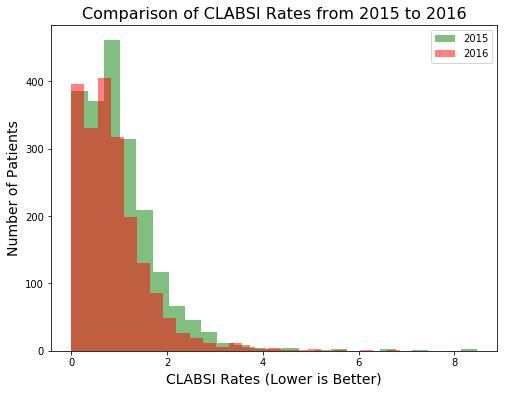

In [181]:
plt.figure(figsize=(8, 6))
plt.hist(df.sir15, color='g', alpha=0.5, bins=25, label='2015')
plt.hist(df.sir16, color='r', alpha=0.5, bins=25, label='2016')
plt.title('Comparison of CLABSI Rates from 2015 to 2016', fontsize=16)
plt.xlabel('CLABSI Rates (Lower is Better)', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.legend(loc=0)
plt.show()

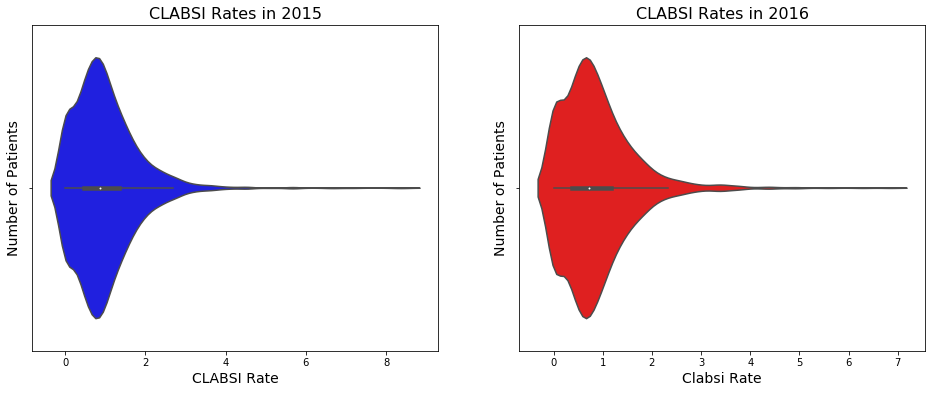

In [198]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.violinplot(df.sir15, color='b', alpha=0.4, bins=25, label='2015')
plt.title('CLABSI Rates in 2015', fontsize=16)
plt.xlabel('CLABSI Rate', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.subplot(122)
sns.violinplot(df.sir16, color='r', alpha=0.4, bins=25, label='2016')
plt.title('CLABSI Rates in 2016', fontsize=16)
plt.xlabel('Clabsi Rate', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.show()

No handles with labels found to put in legend.


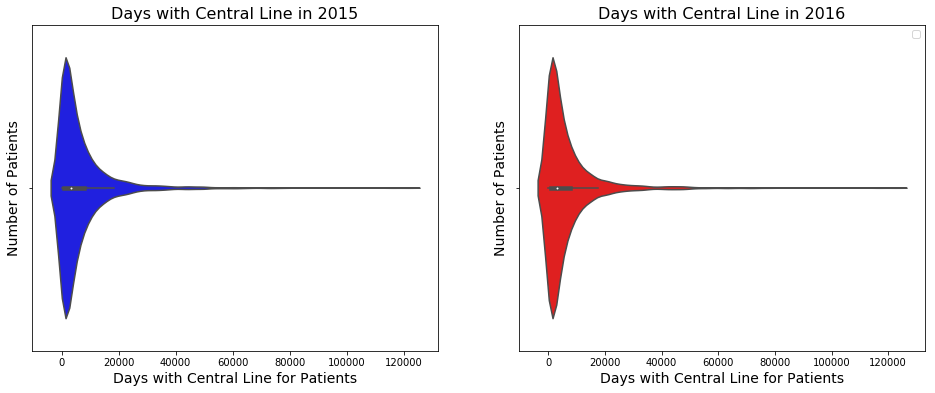

In [192]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.violinplot(df.denom15, color='b', alpha=0.4, bins=25, label='2015')
plt.title('Days with Central Line in 2015', fontsize=16)
plt.xlabel('Days with Central Line for Patients', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.subplot(122)
sns.violinplot(df.denom16, color='r', alpha=0.4, bins=25, label='2016')
plt.title('Days with Central Line in 2016', fontsize=16)
plt.xlabel('Days with Central Line for Patients', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.legend(loc=0)
plt.show()

In [55]:
df.head()

,hosp_id,name,county,region,urban_rural,wage_index,resident_to_beds,beds,dshpct,cost_to_charge,...,casemix,type,ownership,emergency_services,uses_ehrs,denom16,sir16,denom15,sir15,treatment
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1340,5,OURBAN,0.7704,0.0,408,0.29862,0.197,...,1.750650,Acute Care Hospitals,Government - Hospital District or Authority,True,1.0,7264.0,0.688,7117.0,2.816,1.0
1,10005,MARSHALL MEDICAL CENTER SOUTH,1470,5,RURAL,0.8212,0.0,204,0.27654,0.303,...,1.343089,Acute Care Hospitals,Government - Hospital District or Authority,True,1.0,2464.0,0.000,2786.0,2.114,0.0
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,1380,5,OURBAN,0.7325,0.0,358,0.24028,0.186,...,1.668372,Acute Care Hospitals,Government - Hospital District or Authority,True,1.0,8711.0,1.563,11159.0,0.639,0.0
3,10007,MIZELL MEMORIAL HOSPITAL,1190,5,RURAL,0.6874,0.0,78,0.19347,0.368,...,1.012308,Acute Care Hospitals,Voluntary non-profit - Private,True,1.0,282.0,NaN,48.0,NaN,0.0
4,10008,CRENSHAW COMMUNITY HOSPITAL,1200,5,RURAL,0.6973,0.0,29,0.36918,0.493,...,0.928597,Acute Care Hospitals,Proprietary,True,1.0,55.0,NaN,28.0,NaN,1.0


In [86]:
print(column_info.at[5,0])
print(column_info.at[5,1])

WAGE_INDEX
Measures cost of labor in a geographic area, where higher values translates to more expensive staff/higher salaries


In [88]:
# for col in df.columns:
#     print(col.title())
#     print(df[col].isna().sum(), "null value(s)")
#     print(df[col].nunique(), "unique value(s) out of 3263 rows of data")
#     print()

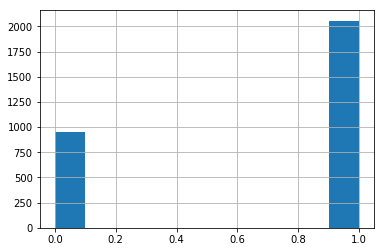

In [89]:
df.treatment.hist()

count    3263.000000
mean        0.978143
std         0.210130
min         0.397800
25%         0.842200
50%         0.931500
75%         1.032900
max         1.934300
Name: wage_index, dtype: float64


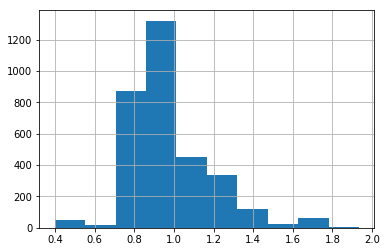

In [93]:
print(df.wage_index.describe())
df.wage_index.hist();